In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
pd.set_option("display.max_columns",100)

from helper_functions.functions import Helpers
from joblib import dump
from joblib import load

In [76]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

grounds = np.load('grounds.npy')
grounds = np.append(grounds, 'other')
enc.fit(pd.DataFrame(grounds))
# dump(enc, 'models/enc.joblib') 

['models/enc.joblib']

In [77]:
enc = load('models/enc.joblib')

In [3]:
## Proxy settings when using cntlm
http_proxy  = "http://localhost:3128"
https_proxy = "https://localhost:3128"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            }
proxyDict = None

In [4]:
mapping = {
    'Richmond': 'richmond',
    'West Coast': 'westcoast',
    'Sydney': 'swans',
    'Adelaide': 'adelaide',
    'Geelong': 'geelong',
    'Greater Western Sydney': 'gws',
    'Melbourne': 'melbourne',
    'Port Adelaide': 'padelaide',
    'Collingwood': 'collingwood',
    'Hawthorn': 'hawthorn',
    'Essendon': 'essendon',
    'Western Bulldogs': 'bullldogs',
    'St Kilda': 'stkilda',
    'North Melbourne': 'kangaroos',
    'Kangaroos' : 'kangaroos',
    'Fremantle': 'fremantle',
    'Brisbane Lions': 'brisbanel',
    'Gold Coast': 'goldcoast',
    'Carlton': 'carlton'
}
teams = list(mapping.keys())

In [108]:
from data_prep.team_history import History
team_df = History(mapping, proxyDict, enc).generate_team_history(season_list=range(16))
# team_df = History(mapping, proxyDict, enc).generate_team_history(season_list=[0]) # current season

Richmond 0
Richmond 1
Richmond 2
Richmond 3
Richmond 4
Richmond 5
Richmond 6
Richmond 7
Richmond 8
Richmond 9
Richmond 10
Richmond 11
Richmond 12
Richmond 13
Richmond 14
Richmond 15
West Coast 0
West Coast 1
West Coast 2
West Coast 3
West Coast 4
West Coast 5
West Coast 6
West Coast 7
West Coast 8
West Coast 9
West Coast 10
West Coast 11
West Coast 12
West Coast 13
West Coast 14
West Coast 15
Sydney 0
Sydney 1
Sydney 2
Sydney 3
Sydney 4
Sydney 5
Sydney 6
Sydney 7
Sydney 8
Sydney 9
Sydney 10
Sydney 11
Sydney 12
Sydney 13
Sydney 14
Sydney 15
Adelaide 0
Adelaide 1
Adelaide 2
Adelaide 3
Adelaide 4
Adelaide 5
Adelaide 6
Adelaide 7
Adelaide 8
Adelaide 9
Adelaide 10
Adelaide 11
Adelaide 12
Adelaide 13
Adelaide 14
Adelaide 15
Geelong 0
Geelong 1
Geelong 2
Geelong 3
Geelong 4
Geelong 5
Geelong 6
Geelong 7
Geelong 8
Geelong 9
Geelong 10
Geelong 11
Geelong 12
Geelong 13
Geelong 14
Geelong 15
Greater Western Sydney 0
Greater Western Sydney 1
Greater Western Sydney 2
Greater Western Sydney 3
Greate

In [110]:
from data_prep.team_history import History
History(mapping, proxyDict, enc).generate_game_data('training-all/', team_df,season_list=range(16))
# History(mapping, proxyDict, enc).generate_game_data('training-all/', team_df, season_list=[0]) # current season

2019 Richmond
2019 West Coast
2019 Sydney
2019 Adelaide
2019 Geelong
2019 Greater Western Sydney
2019 Melbourne
2019 Port Adelaide
2019 Collingwood
2019 Hawthorn
2019 Essendon
2019 Western Bulldogs
2019 St Kilda
2019 North Melbourne
2019 Fremantle
2019 Brisbane Lions
2019 Gold Coast
2019 Carlton
2018 Richmond
2018 West Coast
2018 Sydney
2018 Adelaide
2018 Geelong
2018 Greater Western Sydney
2018 Melbourne
2018 Port Adelaide
2018 Collingwood
2018 Hawthorn
2018 Essendon
2018 Western Bulldogs
2018 St Kilda
2018 North Melbourne
2018 Fremantle
2018 Brisbane Lions
2018 Gold Coast
2018 Carlton
2017 Richmond
2017 West Coast
2017 Sydney
2017 Adelaide
2017 Geelong
2017 Greater Western Sydney
2017 Melbourne
2017 Port Adelaide
2017 Collingwood
2017 Hawthorn
2017 Essendon
2017 Western Bulldogs
2017 St Kilda
2017 North Melbourne
2017 Fremantle
2017 Brisbane Lions
2017 Gold Coast
2017 Carlton
2016 Richmond
2016 West Coast
2016 Sydney
2016 Adelaide
2016 Geelong
2016 Greater Western Sydney
2016 Melbour

In [121]:
X_list = []
y_list = []

for i in range(0,12):
    X = np.load('training-all/training-'+str(2019-i)+'.npy')

    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)

    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2193, 18)
(2193,)
Wins vs losses 0.5699954400364797


In [122]:
from data_prep.feature_eng import Features
cols = Features().cols()
Features().div_cols(X).head()

,Rnd,h_F_mean,h_F_std,h_A_mean,h_A_std,h_M_mean,h_M_std,h_R_mean,h_perc,a_F_mean,a_F_std,a_A_mean,a_A_std,a_M_mean,a_M_std,a_R_mean,a_perc,grnd,perc,R_mean,F_mean,A_mean,F_std,A_std
0,2.0,97.000000,0.000000,64.000000,0.000000,33.000000,0.000000,1.000000,1.515625,65.000000,0.000000,72.000000,0.000000,-7.000000,0.000000,0.000000,0.902778,23.0,1.678846,0.00,1.492308,0.888889,0.000000,0.000000
1,5.0,84.500000,13.973189,97.750000,22.719760,-13.250000,22.719760,0.500000,0.864450,74.500000,12.257651,86.000000,9.486833,-11.500000,9.486833,0.250000,0.866279,32.0,0.997889,2.00,1.134228,1.136628,1.139957,2.394873
2,6.0,85.400000,12.626955,91.600000,23.753737,-6.200000,23.753737,0.600000,0.932314,74.800000,26.194656,103.200000,20.989521,-28.400000,20.989521,0.200000,0.724806,23.0,1.286295,3.00,1.141711,0.887597,0.482043,1.131695
3,9.0,84.375000,17.888107,85.625000,25.203856,-1.250000,25.203856,0.625000,0.985401,82.250000,8.757140,78.000000,23.194827,4.250000,23.194827,0.500000,1.054487,23.0,0.934484,1.25,1.025836,1.097756,2.042688,1.086615
4,10.0,85.555556,17.192447,82.666667,25.192592,2.888889,25.192592,0.666667,1.034946,79.777778,29.637730,79.111111,19.969112,0.666667,19.969112,0.444444,1.008427,12.0,1.026298,1.50,1.072423,1.044944,0.580087,1.261578


In [ ]:
from modelling.training import Training
from scipy.stats import uniform
from scipy.stats import randint
## Using 5 fold cv the average score can be determined by (val. score / 2.8)
## eg if cutoff is 65 then we should expect an average score of 23.2
## If our validation score gets to 70, then we should obtain an average score of 25.

spaceR = {
        'n_estimators': randint(low=350, high=700),
        'max_depth': randint(low=3, high=6),
        'learning_rate': uniform(0.005, 0.1),
        'gamma': uniform(0.04, 0.05),
        'min_child_weight': randint(low=3, high=4),
        'scale_pos_weight': uniform(0, 2),
        'max_delta_step': randint(low=0, high=5),
        'colsample_bytree': uniform(0.1, 0.9),
        'colsample_bylevel': uniform(0.1, 0.9),
        'colsample_bynode': uniform(0.1, 0.9),
        'subsample': uniform(0.1, 0.9),
        'reg_lambda': uniform(0.0, 2.0),
        'reg_alpha': uniform(0.0, 2.0),
        'base_score': uniform(0.5, 0.1),
        }
scores, val_scores, best_models = Training(n_calls=150).trainR(X_list, y_list, space=spaceR)

In [ ]:
from modelling.training import Training
from skopt.space import Real, Integer

spaceB = {
    'n_estimators': Integer(450, 550),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.001, 0.03, "log-uniform"),
    'gamma': Real(0.04, 0.09, "uniform"),
    'min_child_weight': Integer(3, 5),
    'scale_pos_weight': Real(0.9, 1.1, "uniform"),
    'max_delta_step': Integer(3, 5),
    'colsample_bytree': Real(0.1, 1.0, "uniform"),
    'colsample_bylevel': Real(0.1, 1.0, "uniform"),
    'colsample_bynode': Real(0.1, 1.0, "uniform"),
    'subsample': Real(0.05, 0.3, "uniform"),
    'reg_lambda': Real(0.0, 1.5, "uniform"),
    'reg_alpha': Real(0.0, 1.5, "uniform"),
        }
scores, val_scores, best_models = Training(n_calls=50).trainB(X_list, y_list, n_points=1, space=spaceB, cv=3)

In [186]:
scores = scores[1:]
val_scores = val_scores[1:]


Mean test scores 26.90543703495316
Mean validation scores 93.15556944466502


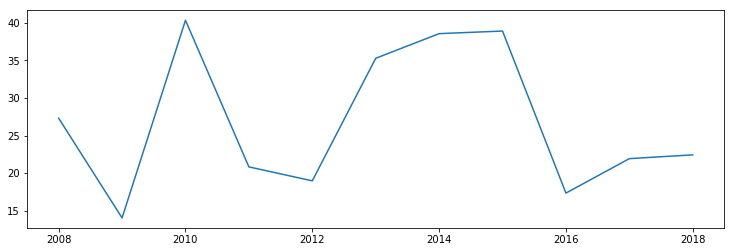

In [187]:
plt.figure(figsize=(12.5,4))
plt.plot(range(2008,2019), scores)
print("")
print("Mean test scores", np.mean(scores))
print("Mean validation scores", np.mean(val_scores))

In [188]:
rows = []
for model in best_models:
    rows.append(model.get_params())
pd.DataFrame(rows).describe()

,base_score,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_delta_step,max_depth,min_child_weight,n_estimators,n_jobs,random_state,reg_alpha,reg_lambda,scale_pos_weight,subsample
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.0,12.000000,12.000000,12.000000,12.000000
mean,0.5,0.576550,0.499587,0.690096,0.059682,0.007913,4.250000,4.083333,4.583333,512.000000,-1.0,0.0,0.645373,0.661481,0.992091,0.217807
std,0.0,0.282768,0.275660,0.263926,0.013584,0.002783,0.753778,0.668558,0.668558,26.924136,0.0,0.0,0.456114,0.465528,0.055890,0.053964
min,0.5,0.115566,0.100000,0.312125,0.041668,0.005304,3.000000,3.000000,3.000000,462.000000,-1.0,0.0,0.000000,0.147750,0.910432,0.111069
25%,0.5,0.423901,0.201207,0.474483,0.046862,0.006195,4.000000,4.000000,4.000000,497.000000,-1.0,0.0,0.434800,0.373826,0.955139,0.197355
50%,0.5,0.575070,0.584185,0.773231,0.060055,0.007676,4.000000,4.000000,5.000000,519.000000,-1.0,0.0,0.676886,0.475425,0.990267,0.212704
75%,0.5,0.733347,0.683314,0.917129,0.070818,0.008108,5.000000,4.250000,5.000000,533.500000,-1.0,0.0,0.836218,0.956143,1.025425,0.255128
max,0.5,1.000000,0.955257,1.000000,0.080978,0.015954,5.000000,5.000000,5.000000,545.000000,-1.0,0.0,1.500000,1.500000,1.100000,0.295086


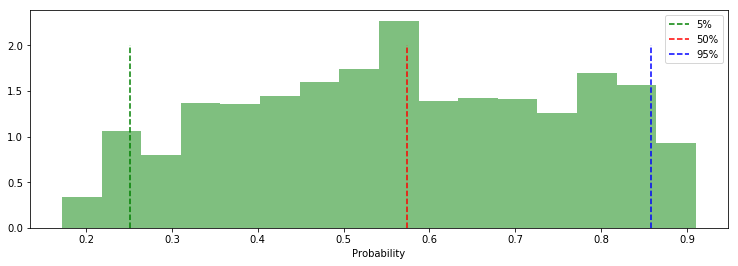

In [189]:
plt.figure(figsize=(12.5,4))
line_height = 2
data = Helpers().averagingModels(X, best_models)
_ = plt.hist(data, bins='auto', density=True, facecolor='green', alpha=0.5)

plt.vlines(np.percentile(data, 5), 0, line_height, linestyle="--", colors='green', label="5%")
plt.vlines(np.percentile(data, 50), 0, line_height, linestyle="--", colors='red', label="50%")
plt.vlines(np.percentile(data, 95), 0, line_height, linestyle="--", colors='blue', label="95%")
plt.xlabel('Probability')
plt.legend()

In [190]:
from helper_functions.functions import Helpers

features = Features().div_cols(X_list[0]).columns

imp = pd.DataFrame(data=Helpers().averagingImp(best_models),
             index=features,
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp

,importance
perc,0.071327
F_mean,0.058190
A_mean,0.056446
h_M_mean,0.050599
R_mean,0.046405
h_perc,0.045332
a_perc,0.044799
a_M_mean,0.043220
h_F_mean,0.040631
h_R_mean,0.039963


## Model Analysis

In [191]:
overall = []
for i in range(len(best_models)):
    season_scores = []
    for rnd in range(1,24):
        df = pd.DataFrame(np.c_[X_list[i],y_list[i]])
        y_new = df[df[0] == rnd][18].values
        x_new = df[df[0] == rnd].drop(18, axis=1).values
        score = Helpers().afl_loss(y_new,best_models[i].predict_proba(Features().div_cols(x_new).values)[:,1])
        season_scores.append(score)
    overall.append(season_scores)

Text(0.5, 1.0, 'Average Cumulative Score')

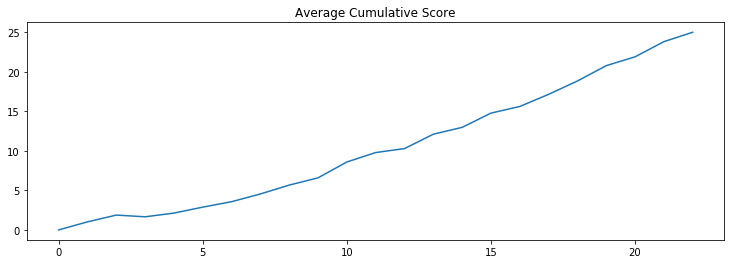

In [192]:
plt.figure(figsize=(12.5,4))
plt.plot(np.cumsum(np.array(np.matrix(np.array(overall)).mean(0)).flatten()))
plt.title('Average Cumulative Score')

In [193]:
data_A = np.load('model_A_scores.npy')
data_B = scores.copy()
print(np.sort(data_A))
print(np.sort(data_B))
print(np.mean(data_A))
print(np.mean(data_B))

[12.15956689 19.21382718 21.78991802 22.33412835 22.3417056  22.48145489
 27.46976236 32.39940932 39.98249465 40.45055324 43.80882099]
[14.03419368 17.34031144 18.96993119 20.82765747 21.92612564 22.43062911
 27.31062567 35.28575062 38.5685744  38.91366638 40.35234177]
27.67560377202703
26.90543703495316


In [194]:
import pymc3 as pm
# The parameters are the bounds of the Uniform.
with pm.Model() as model:
    alpha_A = pm.Exponential('alpha_A', 1/10)
    beta_A = pm.Uniform('beta_A', lower=0, upper=1)
    alpha_B = pm.Exponential('alpha_B', 1/10)
    beta_B = pm.Uniform('beta_B', lower=0, upper=1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", alpha_A/beta_A - alpha_B/beta_B)
    
    obs_A = pm.Gamma("obs_A", alpha=alpha_A, beta=beta_A, observed=data_A)
    obs_B = pm.Gamma("obs_B", alpha=alpha_B, beta=beta_B, observed=data_B)
    
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_B]
>Metropolis: [alpha_B]
>Metropolis: [beta_A]
>Metropolis: [alpha_A]
Sampling 4 chains: 100%|██████████| 74000/74000 [00:15<00:00, 4889.50draws/s]
The number of effective samples is smaller than 10% for some parameters.


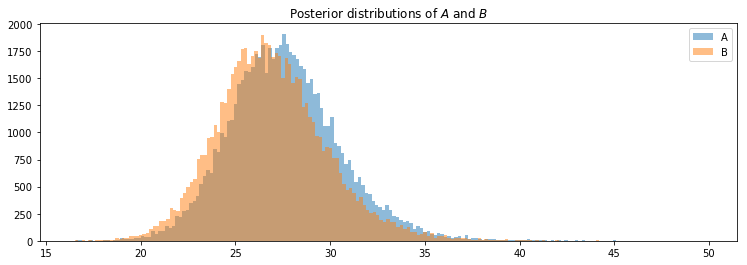

In [195]:
plt.figure(figsize=(12.5,4))
plt.title("Posterior distributions of $A$ and $B$")
plt.hist(burned_trace["alpha_A"]/burned_trace["beta_A"], bins='auto', histtype="stepfilled", alpha=0.5, label="A")
plt.hist(burned_trace["alpha_B"]/burned_trace["beta_B"], bins='auto', histtype="stepfilled", alpha=0.5, label="B")
plt.legend()

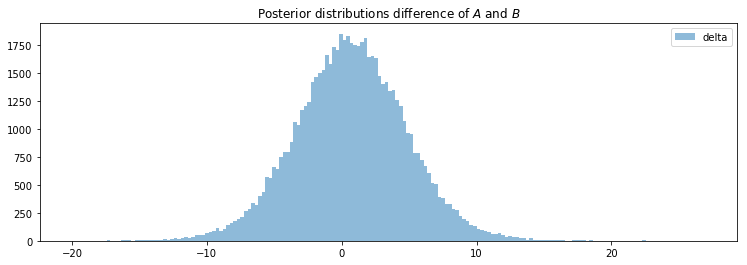

In [196]:
plt.figure(figsize=(12.5,4))
plt.title("Posterior distributions difference of $A$ and $B$")
plt.hist(burned_trace["delta"], bins='auto', histtype="stepfilled", alpha=0.5, label="delta")
plt.legend()

In [197]:
print("Probability model A is WORSE than model B: %.3f" % \
    np.mean(burned_trace["delta"] < 0))

print("Probability model A is BETTER than model B: %.3f" % \
    np.mean(burned_trace["delta"] > 0))

Probability model A is WORSE than model B: 0.430
Probability model A is BETTER than model B: 0.570


In [165]:
# np.save('model_A_scores.npy', data_B)

## Save models

In [164]:
from joblib import dump
# dump(model, 'models/model.joblib') 
for i in range(len(best_models)):
    dump(best_models[i], 'models/model'+str(i)+'.joblib') 

## Load models

In [52]:
from joblib import load
# model = load('models2/model.joblib')
best_models = []
for i in range(11):
    best_models.append(load('models/model'+str(i)+'.joblib'))

## Scoring

In [182]:
from data_prep.web_scraping import Scrape

games = []
start = 149
for i in range(start,start+6):
    games.append(Scrape(mapping, proxyDict).scrape_game(i))
games

[['Adelaide', 'Richmond'],
 ['Essendon', 'Hawthorn'],
 ['Gold Coast', 'St Kilda'],
 ['Fremantle', 'Port Adelaide'],
 ['Carlton', 'Western Bulldogs'],
 ['North Melbourne', 'Greater Western Sydney']]

In [183]:
from modelling.scoring import Scoring
scoring = Scoring(mapping, proxyDict, enc).score_data(games).values

In [184]:
def modelStats(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return [np.mean(predictions, axis=1), np.median(predictions, axis=1), np.std(predictions, axis=1), 
            np.max(predictions, axis=1), np.min(predictions, axis=1)]

arr = np.c_[ games, best_models[0].predict_proba(scoring)[:,1], modelStats(scoring,best_models)[0],
           modelStats(scoring,best_models)[1],modelStats(scoring,best_models)[2],
            modelStats(scoring,best_models)[3], modelStats(scoring,best_models)[4]] 
pd.DataFrame(arr,columns=['home','away', 'prob','prob_avg', 'prob_med', 'prob_std', 'prob_max', 'prob_min'])

,home,away,prob,prob_avg,prob_med,prob_std,prob_max,prob_min
0,Adelaide,Richmond,0.72697526,0.6988595,0.69416773,0.015358243,0.72697526,0.6727494
1,Essendon,Hawthorn,0.6036336,0.61242366,0.611033,0.02555481,0.65893286,0.56441545
2,Gold Coast,St Kilda,0.44653654,0.4498615,0.44574273,0.024659755,0.49875885,0.41776776
3,Fremantle,Port Adelaide,0.53403294,0.5222287,0.5262057,0.024426853,0.5560963,0.46644124
4,Carlton,Western Bulldogs,0.40314883,0.4410311,0.44568035,0.022312889,0.4750572,0.40314883
5,North Melbourne,Greater Western Sydney,0.40209994,0.3637743,0.3599977,0.022149457,0.40209994,0.32321241


## Scratch

In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [7]:
team_df['Richmond',0]

,Rnd,T,Opponent,Scoring,F,Scoring,A,R,M,WDL,Venue,Crowd,Date
0,R1,A,Carlton,5.4 7.8 10.9 14.13,97,0.1 4.4 8.8 9.10,64,W,33,1-0-0,M.C.G.,85016,Thu 21-Mar-2019 7:25 PM
1,R2,H,Collingwood,2.2 6.3 9.4 10.6,66,3.2 7.3 12.4 17.8,110,L,-44,1-0-1,M.C.G.,70699,Thu 28-Mar-2019 7:20 PM
2,R3,A,Greater Western Sydney,3.6 5.10 9.14 10.16,76,2.4 8.7 13.10 19.11,125,L,-49,1-0-2,Showground,12697,Sat 06-Apr-2019 4:35 PM
3,R4,A,Port Adelaide,2.5 6.8 11.8 15.9,99,4.1 7.3 11.6 14.8,92,W,7,2-0-2,Adelaide Oval,38864,Sat 13-Apr-2019 4:05 PM
4,R5,H,Sydney,3.3 9.5 11.9 13.11,89,2.1 4.2 6.3 10.7,67,W,22,3-0-2,Docklands,40053,Sat 20-Apr-2019 7:25 PM
5,R6,H,Melbourne,3.1 5.4 7.9 12.13,85,4.1 4.2 5.5 6.6,42,W,43,4-0-2,M.C.G.,72704,Wed 24-Apr-2019 7:35 PM
6,R7,A,Western Bulldogs,3.2 4.6 7.7 7.10,52,2.5 6.7 12.8 15.9,99,L,-47,4-0-3,Docklands,36151,Sat 04-May-2019 7:25 PM
7,R8,A,Fremantle,4.3 7.4 13.8 17.9,111,3.2 5.3 8.11 12.14,86,W,25,5-0-3,Perth Stadium,42641,Sun 12-May-2019 3:20 PM
8,R9,H,Hawthorn,3.2 6.6 11.7 14.11,95,2.5 3.8 6.9 8.11,59,W,36,6-0-3,M.C.G.,64936,Sun 19-May-2019 3:20 PM
9,R10,H,Essendon,1.2 4.7 8.11 10.13,73,0.3 1.7 2.10 6.14,50,W,23,7-0-3,M.C.G.,80176,Sat 25-May-2019 7:25 PM
